In [1]:
from functools import partial
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

width = 7
height = width / 1.618
matplotlib.rcParams.update({
    'font.size': 12,
    'figure.figsize': (width, height),
    'figure.facecolor': 'white',
    'savefig.dpi': 150,
    'figure.subplot.bottom': 0.125,
    'figure.edgecolor': 'white',
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12
})

In [ ]:
hps = pd.read_csv("results.csv")

In [4]:
def get_best_obj_evolution(df):
    df_chrono = df.sort_values("timestamp_end")
    best_obj = 0
    best_obj_evolution = []
    obj_evolution = []
    for obj in df_chrono['objective']:
        if obj > best_obj:
            best_obj = obj
        best_obj_evolution.append(best_obj)
        obj_evolution.append(obj)
    return obj_evolution, best_obj_evolution, df_chrono['timestamp_end']

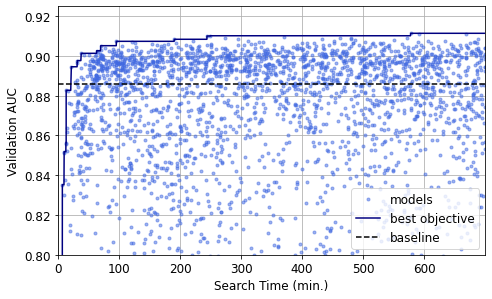

In [24]:
hps_obj_evolution, hps_best_obj_evolution, hps_timestamps = get_best_obj_evolution(hps)

for i, timestamp_obj in enumerate(zip(hps_timestamps, hps_obj_evolution)):
    timestamp, obj = timestamp_obj
    plt.plot(timestamp/60, obj, color='royalblue', linestyle='None', marker='.', alpha=0.5, label="models" if i ==0 else None)
plt.plot(hps_timestamps/60, hps_best_obj_evolution, color='navy', label="best objective")
plt.axhline(0.8859217675140613, color="black", linestyle='--', label="baseline")
# plt.yscale('function', functions=(partial(np.power, 10.0), np.log10))
plt.xlabel('Search Time (min.)')
plt.ylabel('Validation AUC')
plt.xlim(0, hps_timestamps.iloc[-1]/60)
plt.ylim(0.8, 0.925)
# plt.yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
plt.grid()
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("plots/search_trajectory.png")
plt.savefig("plots/search_trajectory.pdf")
plt.show()


In [2]:
def get_num_better_than_baseline_evolution(df):
    df_chrono = df.sort_values("timestamp_end")
    num_better = 0
    num_better_evolution = []
    for obj in df_chrono['objective']:
        if obj > 0.8859217675140613:
            num_better += 1
        num_better_evolution.append(num_better)
    return num_better_evolution, df_chrono['timestamp_end']

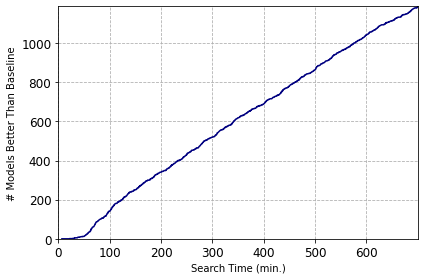

In [3]:
num_better_evolution, hps_timestamps = get_num_better_than_baseline_evolution(hps)

plt.plot(hps_timestamps/60, num_better_evolution, color='navy')
# plt.yscale('function', functions=(partial(np.power, 10.0), np.log10))
plt.xlabel('Search Time (min.)')
plt.ylabel('# Models Better Than Baseline')
plt.xlim(0, hps_timestamps.iloc[-1]/60)
plt.ylim(0, num_better_evolution[-1])
# plt.yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
plt.grid(linestyle='--')
plt.tight_layout()
plt.savefig("plots/num_better_baseline.png")
plt.savefig("plots/num_better_baseline.pdf")
plt.show()